In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train_data = pd.read_csv('train.csv')
train_valid_data = pd.read_csv('train_valid.csv')
test_data = pd.read_csv('test.csv')
X_train, y_train = train_data.iloc[:, :-1], train_data['target']
X_train_valid, y_train_valid = train_valid_data.iloc[:, :-1], train_valid_data['target']
X_test, y_test = test_data.iloc[:, :-1], test_data['target']

In [50]:
param_grid = {
    'n_neighbors': range(1, 16),  # k values from 1 to 15
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Different distance measures
}

In [51]:
# training the model and grid_search
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': range(1, 16)},
             scoring='accuracy')

In [52]:
# Get best model and evaluate it on the validation and test sets
best_knn = grid_search.best_estimator_
print(best_knn)
y_pred = best_knn.predict(X_test)
y_valid_pred = best_knn.predict(X_train_valid)

KNeighborsClassifier(metric='chebyshev')


In [53]:
val_data = pd.read_csv('train_valid.csv')
val_X = val_data.iloc[:, :-1]
val_y = val_data.iloc[:, -1]

# Assuming 'best_knn' is the fine-tuned model from the previous step
# and 'val_predictions' contains the predicted labels for validation set
val_predictions = best_knn.predict(val_X)

# Find misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(val_y, val_predictions)) if true != pred]
misclassified_samples = val_data.iloc[misclassified_indices]
misclassified_samples['Predicted Label'] = val_predictions[misclassified_indices]

# Output the misclassified samples
print("Misclassified samples:")
print(misclassified_samples[['Predicted Label', val_y.name]])

Misclassified samples:
  Predicted Label           target
1  Iris-virginica  Iris-versicolor


C:\Users\Hemanth\AppData\Local\Temp\ipykernel_18228\1041853966.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['Predicted Label'] = val_predictions[misclassified_indices]


In [54]:
# evalutation metrics
accuracy = accuracy_score(y_train_valid, y_valid_pred)
precision = precision_score(y_train_valid, y_valid_pred, average='macro')
recall = recall_score(y_train_valid, y_valid_pred, average='macro')
conf_matrix = confusion_matrix(y_train_valid, y_valid_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation Confusion Matrix:\n{conf_matrix}")

Best Parameters: {'metric': 'chebyshev', 'n_neighbors': 5}
Validation Accuracy: 0.8571428571428571
Validation Precision: 0.8888888888888888
Validation Recall: 0.8888888888888888
Validation Confusion Matrix:
[[2 0 0]
 [0 2 1]
 [0 0 2]]


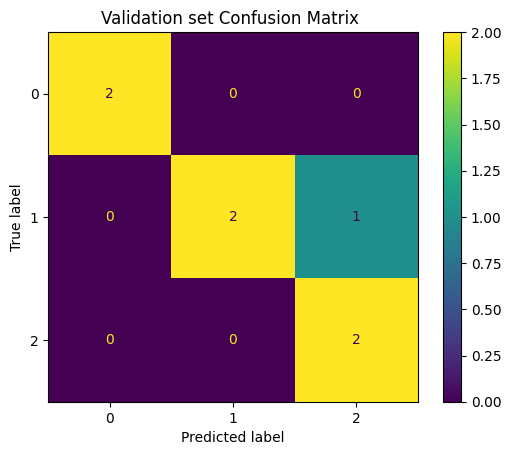

In [55]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Validation set Confusion Matrix ")
plt.show()

In [56]:
# evalutation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test Confusion Matrix:\n{conf_matrix}")

Best Parameters: {'metric': 'chebyshev', 'n_neighbors': 5}
Test Accuracy: 0.9736842105263158
Test Precision: 0.9743589743589745
Test Recall: 0.9696969696969697
Test Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


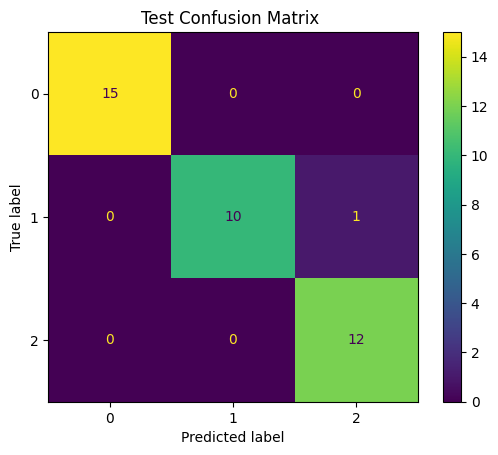

In [57]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Test Confusion Matrix " )
plt.show()